In [1]:
import pandas as pd
import os
from collections import Counter
from visualize import visualize_img
from PIL import Image
os.chdir('..')

# Dataset info

In [2]:
file_path = 'Dataset/data.json'

df = pd.read_json(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Path            566 non-null    object
 1   Classification  566 non-null    object
 2   Type            566 non-null    object
 3   Description     566 non-null    object
 4   DescriptionEN   566 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB
None


In [3]:
print(df.head(5))

                                          Path Classification      Type  \
0  17089462_231004112419923831_954_image05.png        vc-open  abnormal   
1  17090495_230727104701590831_954_image04.png      nose-left  abnormal   
2  17090495_230727104701590831_954_image05.png      nose-left  abnormal   
3  17092118_231121081438130831_954_image01.png       ear-left  abnormal   
4  17092946_230330075548499831_954_image06.png      vc-closed  abnormal   

                                         Description  \
0  thành sau họng đọng dịch nhầy\r\nsụn phễu phù ...   
1  vẹo vách ngăn phần cao\r\nniêm mạc cuốn giữa t...   
2                                      mào vách ngăn   
3  màng nhĩ nguyên vẹn, tam giác sáng còn, màng n...   
4                        sụn phễu phù nề sung huyết    

                                       DescriptionEN  
0  white discharge on the posterior wall of the p...  
1  superior septal deviation\r\npolypoid degenera...  
2                               a spur on the s

Check null value

In [4]:
print(df.isnull().sum())

Path              0
Classification    0
Type              0
Description       0
DescriptionEN     0
dtype: int64


Check for duplicates in the dataset

In [5]:
print(df.duplicated().sum())

0


In [6]:
df.describe()

,Path,Classification,Type,Description,DescriptionEN
count,566,566,566,566,566
unique,566,7,2,296,287
top,17089462_231004112419923831_954_image05.png,nose-left,abnormal,vẹo vách ngăn phần cao,superior septal deviation
freq,1,180,563,77,67


In [7]:
print(df.columns.to_list())

['Path', 'Classification', 'Type', 'Description', 'DescriptionEN']


In [8]:
print(df['Classification'].unique())
print(len(df['Classification'].unique()))

['vc-open' 'nose-left' 'ear-left' 'vc-closed' 'nose-right' 'throat'
 'ear-right']
7


There are 7 types in the classification column.

Classification
nose-left     180
nose-right    128
vc-open        80
vc-closed      62
ear-left       45
ear-right      44
throat         27
Name: count, dtype: int64


<Axes: xlabel='Classification'>

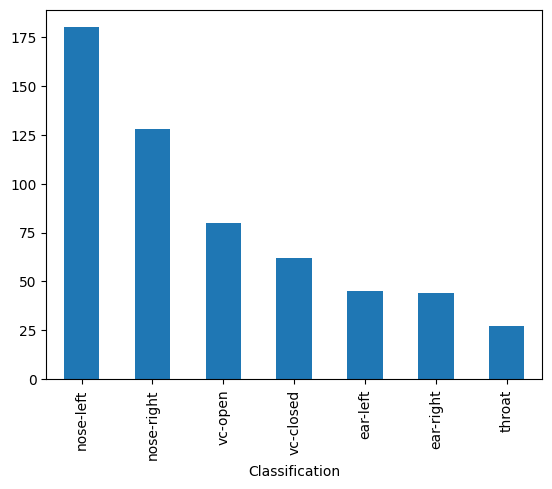

In [9]:
print(df['Classification'].value_counts())
df['Classification'].value_counts().plot(kind='bar')

In [10]:
print(df['Type'].unique())
print(len(df['Type'].unique()))

['abnormal' '']
2


Based on the dataset usage guideline, the is 2 type condition, normal and abnormal, but the dataset only has 566 normal type and 3 empty type (?).

Based on the Description , I guess they are abnornal type. So all of the data is abnormal type, no normal type (?)

In [11]:
df.loc[df['Type'] == '', 'Type'] = 'abnormal'
print(df['Type'].unique())
print(len(df['Type'].unique()))

['abnormal']
1


# Visualization

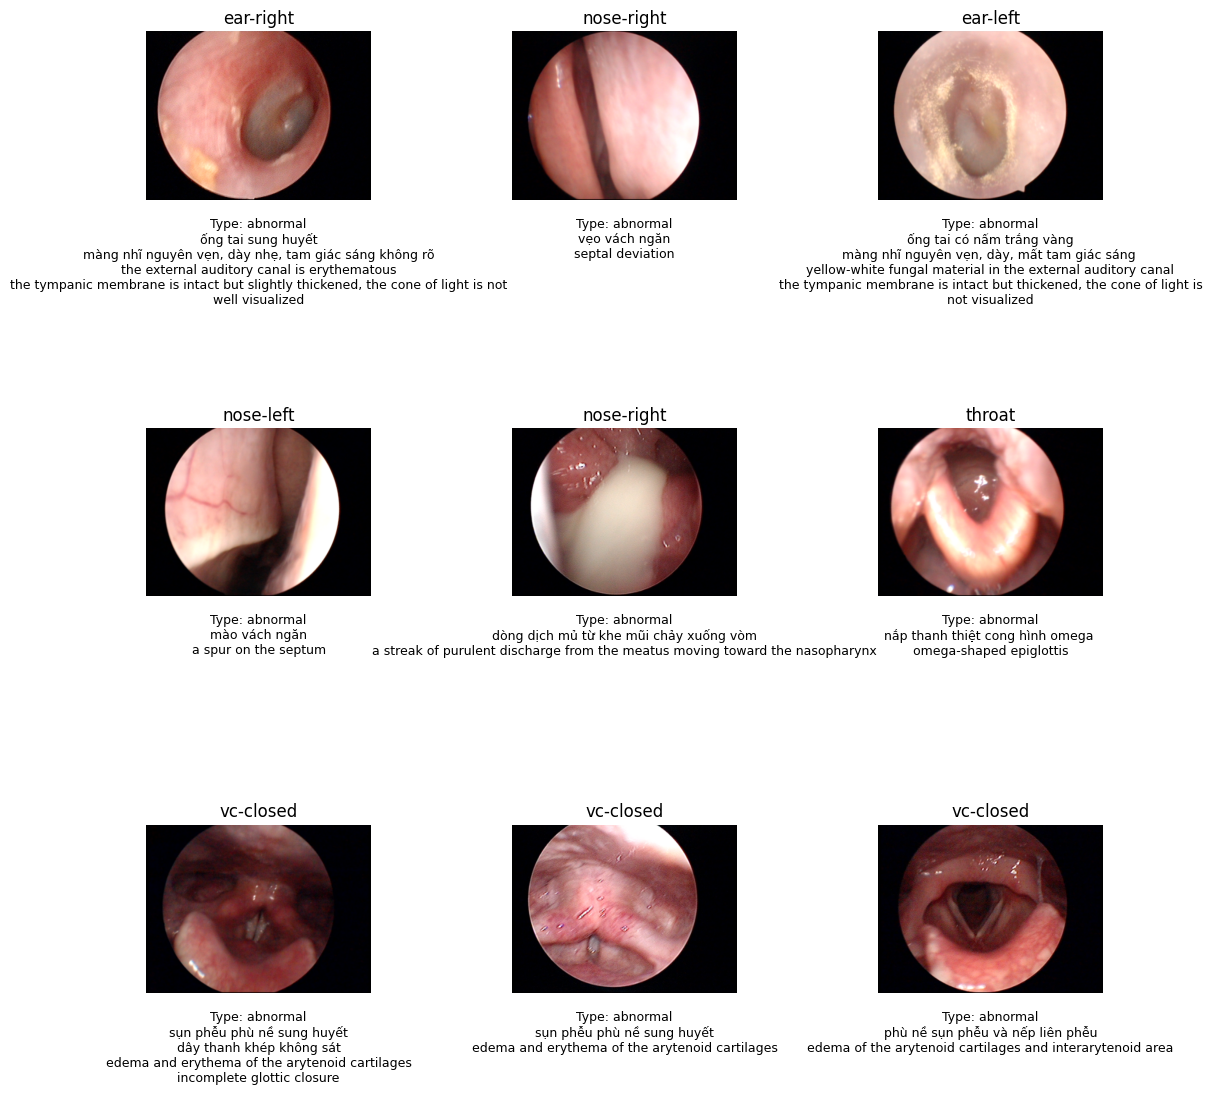

In [12]:
visualize_img(df)

# Important: There is a miss match between the actual path and the path in `data.json`

The actual has postfix `_ImageXX.png` but the path in the **data.json** has postfix `_imageXX.png`. We need to convert it before tranning.

In [13]:
df["Path"] = df["Path"].str.replace("_image", "_Image", regex=False)

# Save cleaned dataset

In [14]:
df.to_csv('Dataset/cleaned_data.csv', index=False)

Validate the output CSV

In [15]:
df = pd.read_csv('Dataset/cleaned_data.csv')
df

,Path,Classification,Type,Description,DescriptionEN
0,17089462_231004112419923831_954_Image05.png,vc-open,abnormal,thành sau họng đọng dịch nhầy\r\nsụn phễu phù ...,white discharge on the posterior wall of the p...
1,17090495_230727104701590831_954_Image04.png,nose-left,abnormal,vẹo vách ngăn phần cao\r\nniêm mạc cuốn giữa t...,superior septal deviation\r\npolypoid degenera...
2,17090495_230727104701590831_954_Image05.png,nose-left,abnormal,mào vách ngăn,a spur on the septum
3,17092118_231121081438130831_954_Image01.png,ear-left,abnormal,"màng nhĩ nguyên vẹn, tam giác sáng còn, màng n...","the tympanic membrane is intact, the cone of l..."
4,17092946_230330075548499831_954_Image06.png,vc-closed,abnormal,sụn phễu phù nề sung huyết,edema and erythema of the arytenoid cartilages
...,...,...,...,...,...
561,13144271_240321094445974831_121_Image06.png,vc-closed,abnormal,sụn phễu phù nề,edema of arytenoid cartilages
562,13148186_240313144957932831_954_Image04.png,vc-open,abnormal,dây thanh (P) phù nề,the right vocal cord is edematous
563,13148338_240906134649350831_121_Image02.png,nose-right,abnormal,"Vòm sung huyết, có khối ở hố Rosenmuller sung ...",Nasopharynx mucosa is edematous and errythemat...
564,13148338_240906134649350831_121_Image04.png,nose-left,abnormal,"Vòm sung huyết, có khối ở hố Rosenmuller sung ...",Nasopharynx mucosa is edematous and errythemat...


In [16]:
sizes = []
for img_name in df['Path']:
  img_path = os.path.join('Dataset/images', img_name)
  with Image.open(img_path) as img:
    sizes.append(img.size) 

size_counts = Counter(sizes)
print(size_counts)

Counter({(640, 480): 566})


There are 566 images with a size of 640 $\times$ 480